In [1]:
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
import os
import torch
from torch.utils.data import random_split
from torch.nn import MultiheadAttention
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read reviews.parquet file
reviews_df = pd.read_parquet('data/reviews.parquet')

# read recipes.parquet file
recipes_df = pd.read_parquet('data/recipes.parquet')

# # read reviews.parquet file
# reviews_df = pd.read_csv('data/reviews.csv')

# # read recipes.parquet file
# recipes_df = pd.read_csv('data/recipes.csv')




# print the first 5 rows of reviews_df
reviews_df.head()


,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25 21:44:00+00:00,2000-01-25 21:44:00+00:00
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17 16:49:59+00:00,2001-10-17 16:49:59+00:00
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25 09:00:00+00:00,2000-02-25 09:00:00+00:00
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13 21:15:00+00:00,2000-03-13 21:15:00+00:00
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28 12:51:00+00:00,2000-03-28 12:51:00+00:00


In [3]:
recipes_df.head()


,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38.0,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09 21:46:00+00:00,Make and share this Low-Fat Berry Blue Frozen ...,[https://img.sndimg.com/food/image/upload/w_55...,...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,None,"[Toss 2 cups berries with sugar., Let stand fo..."
1,39.0,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29 13:12:00+00:00,Make and share this Biryani recipe from Food.com.,[https://img.sndimg.com/food/image/upload/w_55...,...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,None,[Soak saffron in warm milk for 5 minutes and p...
2,40.0,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05 19:52:00+00:00,This is from one of my first Good House Keepi...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,None,"[Into a 1 quart Jar with tight fitting lid, pu..."
3,41.0,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03 14:54:00+00:00,This dish is best prepared a day in advance to...,[https://img.sndimg.com/food/image/upload/w_55...,...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"[Drain the tofu, carefully squeezing out exces..."
4,42.0,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19 06:19:00+00:00,Make and share this Cabbage Soup recipe from F...,[https://img.sndimg.com/food/image/upload/w_55...,...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,None,"[Mix everything together and bring to a boil.,..."


In [4]:
data = pd.merge(reviews_df, recipes_df, on='RecipeId')

# print the merged dataframe
data.head()

,ReviewId,RecipeId,AuthorId_x,AuthorName_x,Rating,Review,DateSubmitted,DateModified,Name,AuthorId_y,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25 21:44:00+00:00,2000-01-25 21:44:00+00:00,Jalapeno Pepper Poppers,1545,...,4.9,23.7,172.5,3.2,0.6,0.9,4.3,24.0,None,"[In a mixing bowl, combine cheeses, bacon and ..."
1,250,992,4242,marie m,5,my family loved these. fresher than any bough...,2001-01-02 16:19:29+00:00,2001-01-02 16:19:29+00:00,Jalapeno Pepper Poppers,1545,...,4.9,23.7,172.5,3.2,0.6,0.9,4.3,24.0,None,"[In a mixing bowl, combine cheeses, bacon and ..."
2,242612,992,205100,mommyoftwo,5,Wow! Awesome - Awesome - Awesome! And I don'...,2006-01-27 06:09:46+00:00,2006-01-27 06:09:46+00:00,Jalapeno Pepper Poppers,1545,...,4.9,23.7,172.5,3.2,0.6,0.9,4.3,24.0,None,"[In a mixing bowl, combine cheeses, bacon and ..."
3,463486,992,559815,karen.nash-horton,4,This is a good recipe. I much prefer the oven ...,2007-08-15 11:04:13+00:00,2007-08-15 11:04:13+00:00,Jalapeno Pepper Poppers,1545,...,4.9,23.7,172.5,3.2,0.6,0.9,4.3,24.0,None,"[In a mixing bowl, combine cheeses, bacon and ..."
4,643932,992,743849,NELady,5,"GREAT recipe! I used fat free cream cheese, p...",2008-06-02 18:24:08+00:00,2008-06-02 18:24:08+00:00,Jalapeno Pepper Poppers,1545,...,4.9,23.7,172.5,3.2,0.6,0.9,4.3,24.0,None,"[In a mixing bowl, combine cheeses, bacon and ..."


In [5]:
df = data[["RecipeId", "AuthorId_x", "Rating", "Calories", "ReviewCount"]]

# remove duplicates without considering the first column
df = df[~df.iloc[:, 1:].duplicated(keep='first', subset=df.columns[1:])]

# reset the index and drop the original index column
df = df.reset_index(drop=True)

# print the updated dataframe
df.head()

,RecipeId,AuthorId_x,Rating,Calories,ReviewCount
0,992,2008,5,111.4,15.0
1,992,4242,5,111.4,15.0
2,992,205100,5,111.4,15.0
3,992,559815,4,111.4,15.0
4,992,743849,5,111.4,15.0


In [6]:


class RecipeDataset(Dataset):
    def __init__(self, data):
        self.user_encoder = LabelEncoder()
        self.item_encoder = LabelEncoder()
        self.recipe_ids = self.item_encoder.fit_transform(data["RecipeId"].values)
        self.author_ids = self.user_encoder.fit_transform(data["AuthorId_x"].values)

        self.ratings = data["Rating"].astype(float).values
        self.calories = data["Calories"].astype(float).values
        self.review_counts = data["ReviewCount"].astype(float).values

    def __len__(self):
        return len(self.recipe_ids)

    def __getitem__(self, idx):
        recipe_id = self.recipe_ids[idx]
        author_id = self.author_ids[idx]
        rating = self.ratings[idx]
        calories = self.calories[idx]
        review_count = self.review_counts[idx]
        return (recipe_id, author_id, calories, review_count), rating


In [7]:
import torch.nn.functional as F

data = RecipeDataset(data)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(data))
val_size = len(data) - train_size
train_dataset, val_dataset = random_split(data, [train_size, val_size])

# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
saved_models_dir = 'saved_models'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


class RecipeModel(torch.nn.Module):
    def __init__(self, num_recipes, num_authors, max_calories, max_review_counts, embedding_dim=16, num_heads=4):
        super().__init__()
        self.recipe_embedding = torch.nn.Embedding(num_recipes, embedding_dim)
        self.author_embedding = torch.nn.Embedding(num_authors, embedding_dim)
        self.calorie_embedding = torch.nn.Embedding(max_calories, embedding_dim)
        self.review_count_embedding = torch.nn.Embedding(max_review_counts, embedding_dim)

        # self.embedding_transform = torch.nn.Linear(embedding_dim * 4, embedding_dim)
        self.attention = torch.nn.MultiheadAttention(embed_dim=embedding_dim*4, num_heads=num_heads)
        # self.fc1 = torch.nn.Linear(embedding_dim * 4, 16)

        self.fc1 = torch.nn.Linear(embedding_dim * 4, 16)
        self.fc2 = torch.nn.Linear(16, 1)
        self.activation = torch.nn.Sigmoid()

    def forward(self, recipe_id, author_id, calories, review_counts):
        recipe_embedded = self.recipe_embedding(recipe_id)
        author_embedded = self.author_embedding(author_id)
        calorie_embedded = self.calorie_embedding(calories.long())
        review_count_embedded = self.review_count_embedding(review_counts.long())

        x = torch.cat([recipe_embedded, author_embedded, calorie_embedded, review_count_embedded], dim=-1)
        # x = self.embedding_transform(x)
        
        x = x.unsqueeze(1)

        attn_output, _ = self.attention(x, x, x)
        
        x = attn_output.squeeze(1)

        # x = torch.mean(attn_output, dim=1)  # Compute the mean along the sequence_length dimension

        x = self.fc1(x)
        # x = F.relu(x)
        x = self.fc2(x)
        x = self.activation(x)

        return (x * 5.0).view(-1)




# Calculate the maximum values for Calories and ReviewCount
max_calories = int(df["Calories"].max())
max_review_count = int(df["ReviewCount"].max())

model = RecipeModel(num_recipes=len(data.item_encoder.classes_) + 1, 
                    num_authors=len(data.user_encoder.classes_) + 1,
                    max_calories=max_calories+1,
                    max_review_counts=max_review_count+1)

In [8]:
# Initialize the best validation loss to a large value
best_valid_loss = float('inf')

# Create a directory for the saved models if it doesn't exist
os.makedirs(saved_models_dir, exist_ok=True)
# RecipeModel(num_recipes=data.loc[:,'RecipeId'].max()+1, num_authors=data.loc[:,"AuthorId_x"].max()+1)
model = model.to(device) # Send model to GPU if available

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch, targets in train_loader:
        optimizer.zero_grad()
        batch = [b.to(device) for b in batch]
        targets = targets.float().to(device)
        preds = model(*batch)

        loss = criterion(preds, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * batch[0].shape[0]
    train_loss /= len(train_dataset)

    model.eval()
    valid_loss = 0
    with torch.no_grad():
        for batch, targets in valid_loader:
            batch = [b.to(device) for b in batch]
            targets = targets.float().to(device)
            preds = model(*batch)
            loss = criterion(preds, targets)
            valid_loss += loss.item() * batch[0].shape[0]
        valid_loss /= len(val_dataset)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}")

    # Check if the current validation loss is lower than the best validation loss
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        print(f"Validation loss improved. Saving the model to {saved_models_dir}/best_model.pt")
        torch.save(model.state_dict(), f"{saved_models_dir}/best_model.pt")

Epoch 1/10, Train Loss: 1.5715, Valid Loss: 1.5158
Validation loss improved. Saving the model to saved_models/best_model.pt
Epoch 2/10, Train Loss: 1.4793, Valid Loss: 1.4947
Validation loss improved. Saving the model to saved_models/best_model.pt
Epoch 3/10, Train Loss: 1.4153, Valid Loss: 1.4890
Validation loss improved. Saving the model to saved_models/best_model.pt
Epoch 4/10, Train Loss: 1.3463, Valid Loss: 1.5116
Epoch 5/10, Train Loss: 1.2759, Valid Loss: 1.5155
Epoch 6/10, Train Loss: 1.2053, Valid Loss: 1.6004
Epoch 7/10, Train Loss: 1.1345, Valid Loss: 1.5910
Epoch 8/10, Train Loss: 1.0696, Valid Loss: 1.7158
Epoch 9/10, Train Loss: 1.0080, Valid Loss: 1.7472
Epoch 10/10, Train Loss: 0.9523, Valid Loss: 1.7326


In [9]:
model.load_state_dict(torch.load(f"{saved_models_dir}/best_model.pt"))
model = model.to(device) # Send model to GPU if available

author_id = 1545
recipe_ids = df["RecipeId"].unique()[:10000]
# recipe_ids = df["RecipeId"].unique()


user_has_ratings = author_id in df["AuthorId_x"].values

if user_has_ratings:
    user_rated_recipe_ids = df[df["AuthorId_x"] == author_id]["RecipeId"].unique()
else:
    user_rated_recipe_ids = []

# Create a recommendation dataset
recommendation_data = []
for recipe_id in recipe_ids:
    if not user_has_ratings or (user_has_ratings and recipe_id not in user_rated_recipe_ids):
        recipe_id_transformed = data.item_encoder.transform([recipe_id])[0]
        recipe_data = df[df["RecipeId"] == recipe_id].iloc[0]
        recommendation_data.append((recipe_id_transformed, author_id, recipe_data["Calories"], recipe_data["ReviewCount"]))

recommendation_dataset = [(torch.tensor(a).to(device), torch.tensor(b).to(device), torch.tensor(c).to(device), torch.tensor(d).to(device)) for a, b, c, d in recommendation_data]
recommendation_loader = DataLoader(recommendation_dataset, batch_size=batch_size, shuffle=False)
# Model evaluation
model.eval()
with torch.no_grad():
    ratings = []
    for inputs in recommendation_loader:
        rating = model(*inputs)
        ratings.extend(rating.detach().cpu().numpy())



In [10]:
top_recipe_ids = [recipe_ids[i] for i in sorted(range(len(ratings)), key=lambda i: ratings[i], reverse=True)[:10]]
print(top_recipe_ids)

[13526, 32173, 543, 23326, 27475, 9954, 4790, 34185, 31562, 9327]


MAP@1: 0.1311
MAP@3: 0.0843
MAP@5: 0.0672
MAP@10: 0.0478


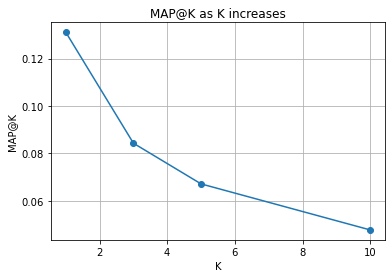

In [16]:


def apk(actual, predicted, k=10):
    if len(predicted) > k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)

    if not actual:  # Updated condition to check if the 'actual' list is empty
        return 0.0

    return score / min(len(actual), k)



def mapk(actual, predicted, k=10):
    return np.mean([apk(a, p, k) for a, p in zip(actual, predicted)])


def evaluate_mapk(k_values, model, valid_loader):
    mapk_scores = []

    for k in k_values:
        actual = []
        predicted = []
        
        for batch, targets in valid_loader:
            batch = [b.to(device) for b in batch]
            targets = targets.float().to(device)
            preds = model(*batch)
            actual.append(list(targets.detach().cpu().numpy()))
            predicted.append(list(np.argsort(-preds.detach().cpu().numpy())))  # Get the indices of the sorted predictions

        mapk_score = mapk(actual, predicted, k=k)
        mapk_scores.append(mapk_score)
        print(f"MAP@{k}: {mapk_score:.4f}")

    return mapk_scores


# Evaluate the model with different values of K
k_values = [1, 3, 5, 10]
mapk_scores = evaluate_mapk(k_values, model, valid_loader)

# Plot the MAP@K graph
plt.plot(k_values, mapk_scores, marker='o')
plt.xlabel("K")
plt.ylabel("MAP@K")
plt.title("MAP@K as K increases")
plt.grid()
plt.show()


